In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df = pd.read_excel('../data/lake/all_reservoirs_data.xlsx', sheet_name='Data')
df

,Reservoir,Reservoir_type,Year,Cyanobacteria_Max_cells/ml,logCyanoMax_cells/ml,Chlorophyll_a_ug/l,Secchi_cm,TP_ppb,P_dissolved_ppb,TKN_ppm,...,mayST_Celsius,junST_Celsius,julST_Celsius,augST_Celsius,mayDO_mg/l,junDO_mg/l,mayDT_Celsius,junDT_Celsius,julDT_Celsius,augDT_Celsius
0,BHR,1,1987,na,na,na,162,5,5,0.125,...,na,na,na,na,na,na,na,na,na,na
1,BHR,1,1988,235.616384,2.372205,na,na,5,32.5,0.05,...,na,na,na,na,na,na,na,na,na,na
2,BHR,1,1989,na,na,na,na,12,7.5,0.2,...,18.56945,24.6643,27.1132,26.83358,8.488579,6.277267,12.946836,17.037883,20.765282,22.331586
3,BHR,1,1990,na,na,2,116,115,115,0.075,...,20.34055,24.5,27.8436,26.9803,7.503207,4.352679,14.655307,17.616071,20.855864,21.938536
4,BHR,1,1991,na,na,na,103,35.5,10,0.133333,...,23.826517,26.6232,28.385333,27.56425,na,3.833392,16.090436,21.098133,23.554757,25.351131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,WFR,3,2014,543030.526415,5.734824,na,17.333333,98.019444,na,1.941667,...,na,na,25.6425,26.4095,na,na,na,na,na,na
636,WFR,3,2015,74179.044255,4.870281,10.907692,27,63.333333,na,1.755556,...,na,na,27.3925,25.7295,na,na,na,na,na,na
637,WFR,3,2016,311859.995745,5.49396,18.959231,22,84.618182,na,0.939273,...,21.036033,25.9376,28.4175,28.8245,na,na,na,na,na,na
638,WFR,3,2017,1938802.054757,6.287533,7.779167,13,218.238095,106,1.253333,...,20.158367,24.6594,26.4075,26.0635,na,na,na,na,na,na


In [26]:
# Traitement 
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

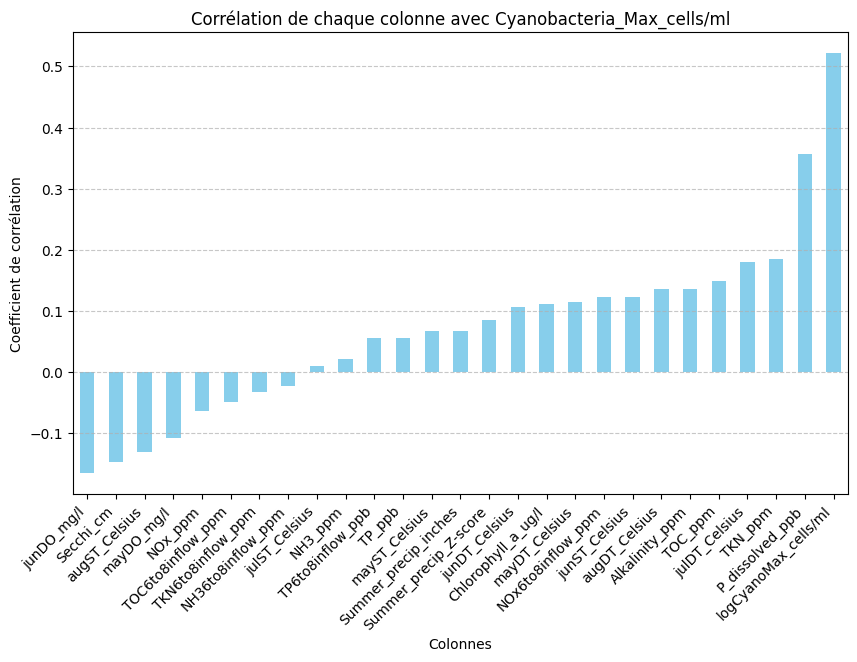

In [35]:
# Colonne cible
target_column = "Cyanobacteria_Max_cells/ml"

# Calcul des corrélations
correlation_matrix = df.drop(columns=['Reservoir', 'Reservoir_type', 'Year']).corr()[target_column].drop(target_column) 

# Tracer un graphique en barres des corrélations
correlation_matrix.sort_values().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f"Corrélation de chaque colonne avec {target_column}")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Colonnes")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

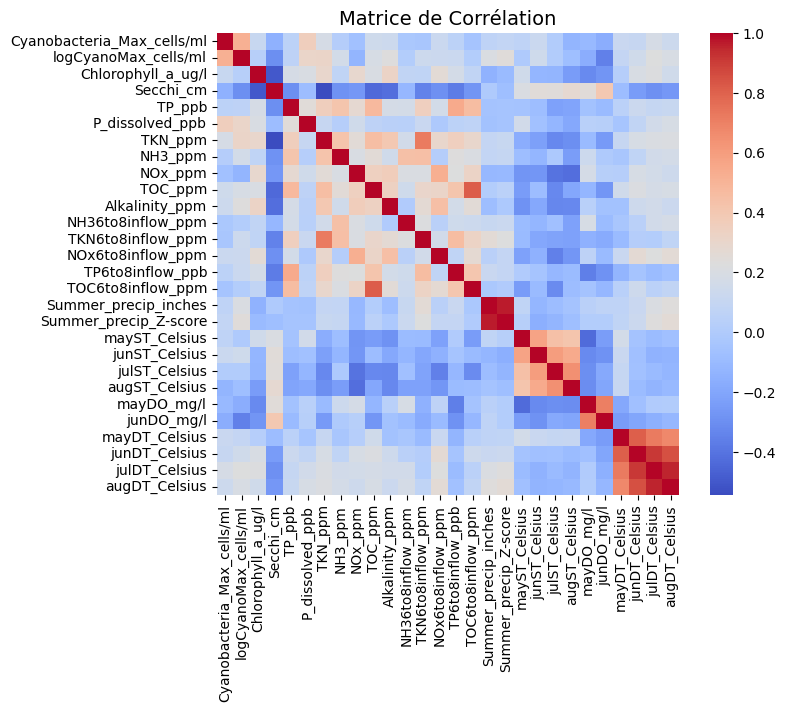

In [32]:
# Matrice de corrélation avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de Corrélation", fontsize=14)
plt.show()